# Visualize

In [1]:
# import library
import pandas as pd
from datetime import datetime
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_df = pd.read_csv('data/cleaned_data.csv')

clean_df

,CARNAME,ID,Make,Model,Body color,Type of finish,Interior color,Interior material,Body,Doors,...,First registration,Condition,Consumption,Price(EUR),Tags,Engine capacity(ccm),Previous owners,Battery capacity(kWh),Warranty until,Weight
0,hyundai kona,61032325,Hyundai,Kona,Grey,Metallic,Black interior,Full leather interior,SUV / offroad,4/5 doors,...,2023-09-01,New,0 kWh/100km (combined),53099,Ventilated front seats; Heated rear seats; Par...,1499.0,0.0,NaN,NaN,1601.55
1,volkswagen up!,61032250,Volkswagen,up!,Black,Metallic,Other interior color,Cloth interior,Hatchback,4/5 doors,...,2023-09-01,New,5.5 l/100km (combined),27749,Heated front seats; Bluetooth; Automatic A/C; ...,999.0,0.0,NaN,NaN,1601.55
2,seat ibiza,61032203,Seat,Ibiza,Black,Metallic,Grey interior,Cloth interior,Hatchback,4/5 doors,...,2023-06-01,Demonstration car,4.8 l/100km (combined); 7.7 l/100km (city); 5....,27549,LED headlights; Digital cockpit; Keyless entry...,999.0,0.0,NaN,NaN,1601.55
3,ford kuga,61032104,Ford,Kuga,Silver,Metallic,Black interior,Cloth interior,SUV / offroad,4/5 doors,...,2023-04-01,New,6.6 l/100km (combined); 6.9 l/100km (city); 4....,37249,Heated rear seats; LED headlights; Digital coc...,1496.0,1.0,NaN,NaN,1601.55
4,dodge nitro,61032099,Dodge,Nitro,White,Metallic,Black interior,Full leather interior,SUV / offroad,4/5 doors,...,2011-04-01,Used,12.1 l/100km (combined),14799,Electric adjustable front seats; Heated front ...,3952.0,2.0,NaN,NaN,1601.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,renault megane,61021653,Renault,Megane,Grey,Metallic,Other interior color,Cloth interior,Sedans / saloons,4/5 doors,...,2023-07-01,New,16.2 l/100km (combined),53249,LED headlights; Digital cockpit; Harman/Kardon...,1499.0,0.0,NaN,NaN,1601.55
2286,mercedes-benz cls-350,61021644,Mercedes-Benz,CLS 350,Black,Metallic,Black interior,Full leather interior,Coupe,4/5 doors,...,2019-01-01,Used,NaN,55949,Laser headlights; Ventilated front seats; Adap...,1499.0,0.0,NaN,NaN,1601.55
2287,fiat 500x,61021615,Fiat,500X,Black,Metallic,Other interior color,Cloth interior,SUV / offroad,4/5 doors,...,2023-09-01,New,NaN,34899,LED headlights; Keyless entry; Adaptive cruise...,1469.0,0.0,NaN,NaN,1405.00
2288,peugeot 3008,61021623,Peugeot,3008,Red,Metallic,Black interior,Cloth interior,SUV / offroad,4/5 doors,...,2020-02-01,Used,6.9 l/100km (combined),39799,Heated front seats; Head-up display; Automatic...,1598.0,0.0,14.0,2024-12-01,1601.55


size of data

In [3]:
clean_df.shape

(2290, 32)

Check Dtype of columns

In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CARNAME                2290 non-null   object 
 1   ID                     2290 non-null   int64  
 2   Make                   2290 non-null   object 
 3   Model                  2290 non-null   object 
 4   Body color             2290 non-null   object 
 5   Type of finish         2290 non-null   object 
 6   Interior color         2290 non-null   object 
 7   Interior material      2290 non-null   object 
 8   Body                   2290 non-null   object 
 9   Doors                  2290 non-null   object 
 10  Seats                  2290 non-null   float64
 11  Fuel                   2290 non-null   object 
 12  Transmission           2290 non-null   object 
 13  Drive type             2290 non-null   object 
 14  Power(kW)              2290 non-null   int64  
 15  CO2 

### Numerical analysis using descriptive statistics

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

In [16]:
# Tạo bản sao của clean_df
df_copy = clean_df.copy()

# Chỉ giữ lại các cột có kiểu dữ liệu là int hoặc float
df_copy = df_copy.select_dtypes(include=['int64', 'float64'])

# Tính các chỉ số mô tả thống kê
# Mean
mean = df_copy.mean()

# Median
median = df_copy.median()

# Mode
mode = df_copy.mode().iloc[0]  # Lấy mode (trong trường hợp có nhiều mode)

# Quantiles
quantiles = df_copy.quantile([0.25, 0.5, 0.75])

# Range và IQR
data_range = df_copy.max() - df_copy.min()
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

# Variance và Standard deviation
variance = df_copy.var()
std_dev = df_copy.std()

# Coefficient of Variation
coefficient_of_variation = (std_dev / mean) * 100

# Skewness
skewness = df_copy.skew()

# Kurtosis
kurtosis = df_copy.kurt()

# Standard Error
sample_size = len(df_copy)
standard_error = std_dev / (sample_size ** 0.5)

# Moments
# First four moments of the distribution
first_moment = mean
second_moment = df_copy.apply(lambda x: ((x - mean) ** 2).mean())
third_moment = df_copy.apply(lambda x: ((x - mean) ** 3).mean())
fourth_moment = df_copy.apply(lambda x: ((x - mean) ** 4).mean())

# Adjusted for unbiased estimates
n = len(clean_df)
third_moment_unbiased = third_moment * (n * (n - 1)) / ((n - 1) * (n - 2))
fourth_moment_unbiased = fourth_moment * ((n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3))) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))

# Calculate moments
moments = {
    '1st Moment (Mean)': first_moment,
    '2nd Moment (Variance)': second_moment,
    '3rd Moment (Skewness)': third_moment,
    '4th Moment (Kurtosis)': fourth_moment,
    '3rd Moment Unbiased': third_moment_unbiased,
    '4th Moment Unbiased': fourth_moment_unbiased
}

# Covariance và Correlation
covariance = df_copy.cov()
correlation = df_copy.corr()

df_copy

,ID,Seats,Power(kW),CO2 emissions(g/km),AC charging time(h),DC charging time(min),Battery warranty(km),Mileage(km),Price(EUR),Engine capacity(ccm),Previous owners,Battery capacity(kWh),Weight
0,61032325,5.0,160,0,6.0,40.0,160000.0,10,53099,1499.0,0.0,NaN,1601.55
1,61032250,4.0,61,112,NaN,NaN,NaN,35,27749,999.0,0.0,NaN,1601.55
2,61032203,5.0,81,110,NaN,NaN,NaN,2855,27549,999.0,0.0,NaN,1601.55
3,61032104,5.0,110,125,NaN,NaN,NaN,8,37249,1496.0,1.0,NaN,1601.55
4,61032099,5.0,191,288,NaN,NaN,NaN,158863,14799,3952.0,2.0,NaN,1601.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,61021653,5.0,96,0,NaN,NaN,NaN,10,53249,1499.0,0.0,NaN,1601.55
2286,61021644,5.0,210,0,NaN,NaN,NaN,46006,55949,1499.0,0.0,NaN,1601.55
2287,61021615,5.0,96,0,NaN,NaN,NaN,5,34899,1469.0,0.0,NaN,1405.00
2288,61021623,5.0,221,124,NaN,NaN,NaN,26391,39799,1598.0,0.0,14.0,1601.55


**Comment**:

- Cung cấp một ước lượng chính xác hơn về phân phối dữ liệu.
- Tập trung vào việc phân tích các biến số quan trọng để đánh giá mô hình và hiểu sâu hơn về dữ liệu.
- Đây là bước quan trọng để có cái nhìn toàn diện hơn về các thông số thống kê và phân tích dữ liệu.

### Describe the correlation between features in the dataset

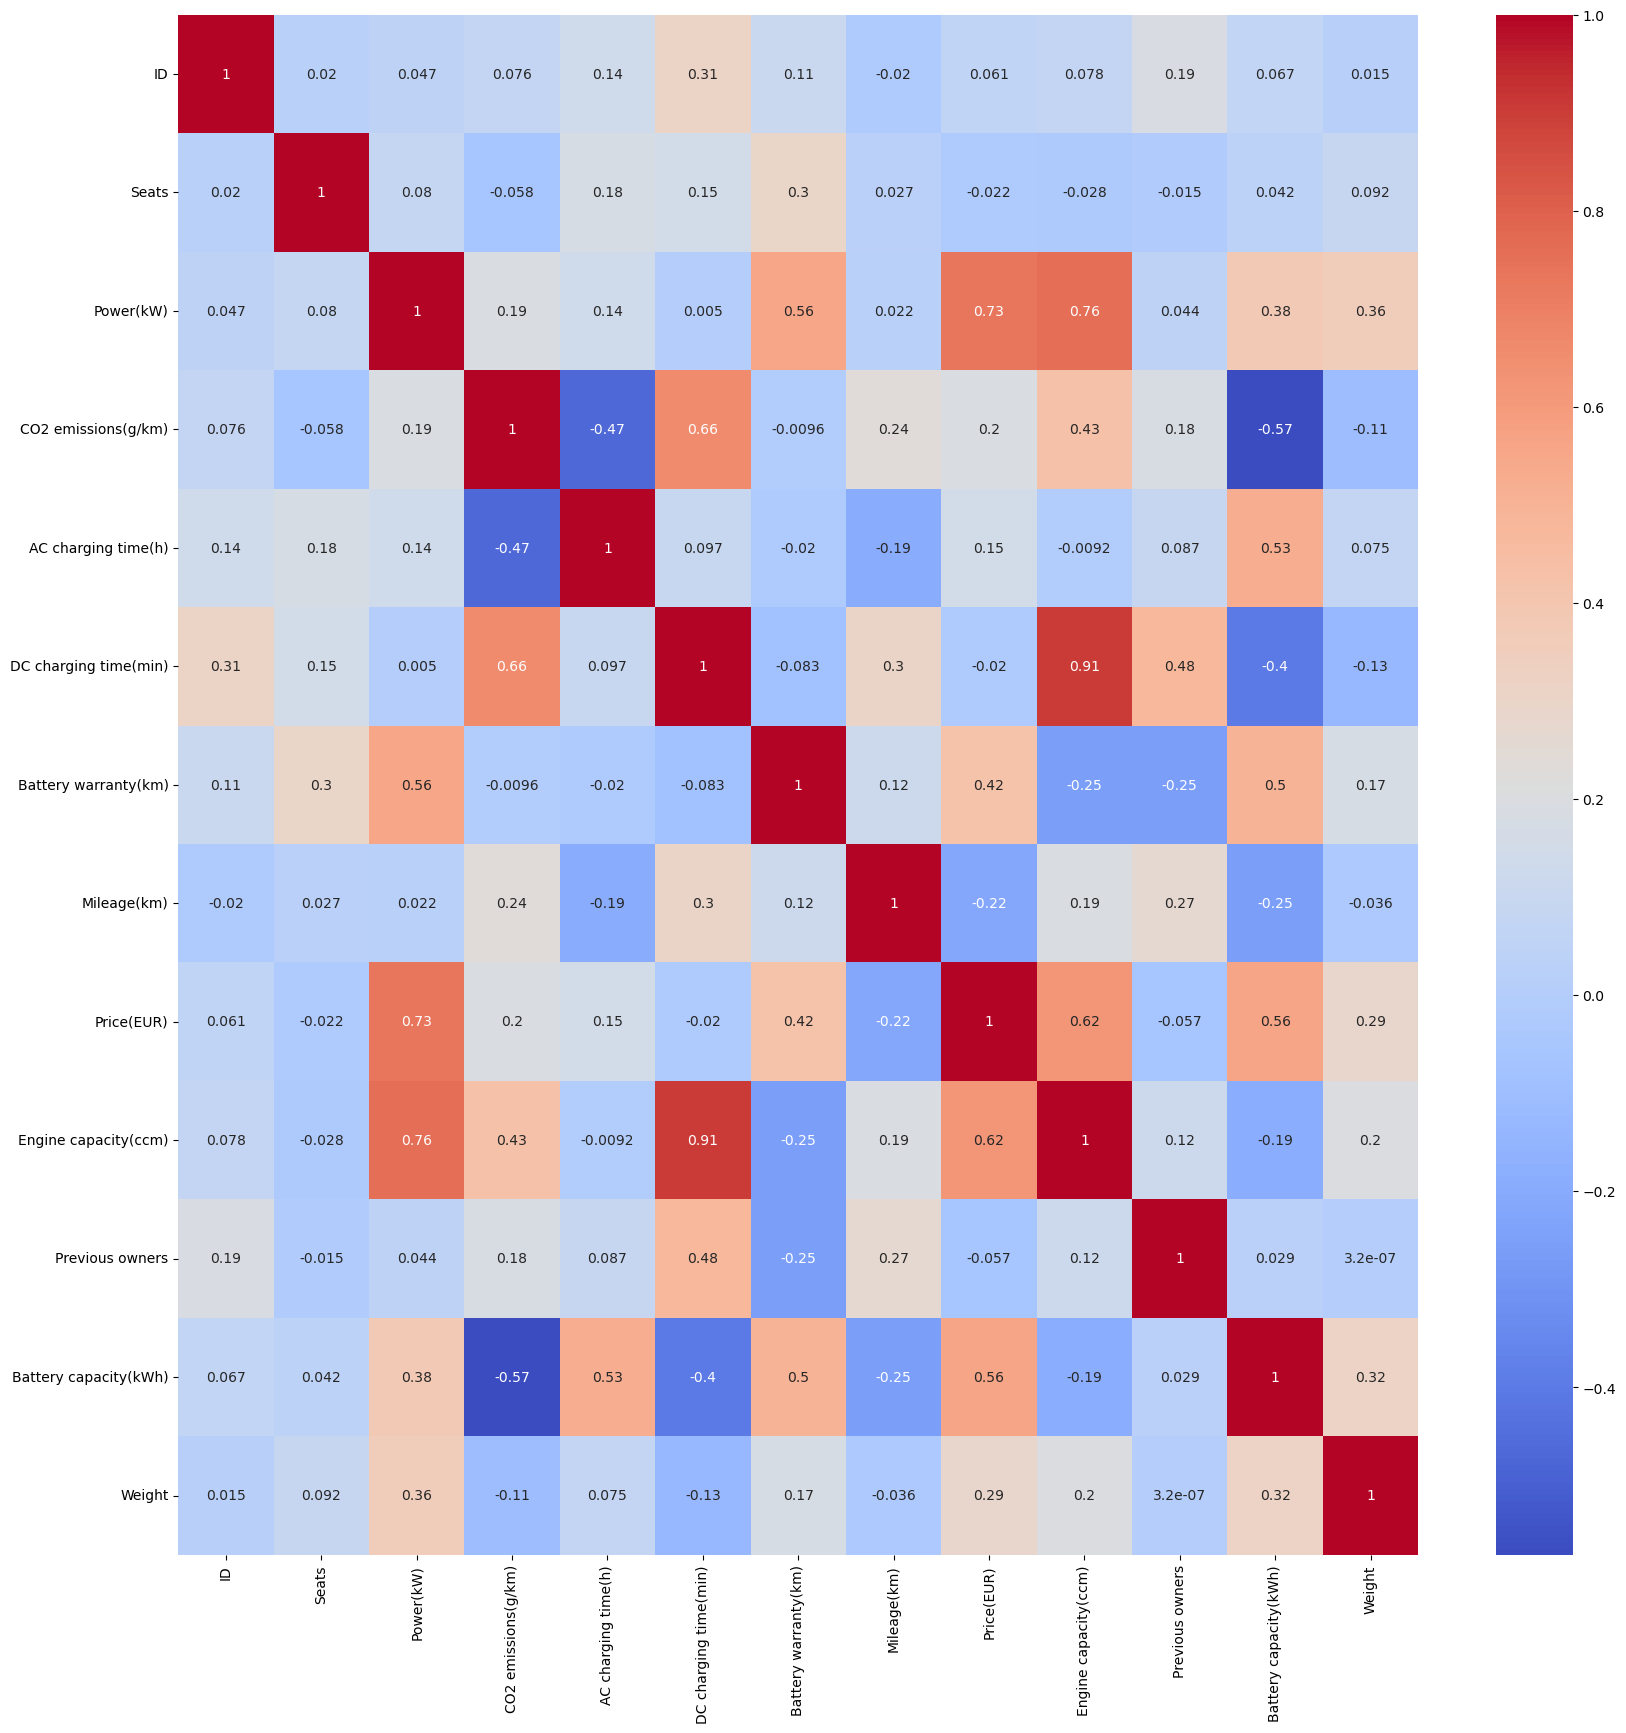

In [17]:
df_copy = clean_df.select_dtypes(exclude = 'object').copy()
corr_matrix = df_copy.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.show()

**Question 01:** How does the correlation between different vehicle specifications vary across the top 10 cars with the highest price(EUR)?

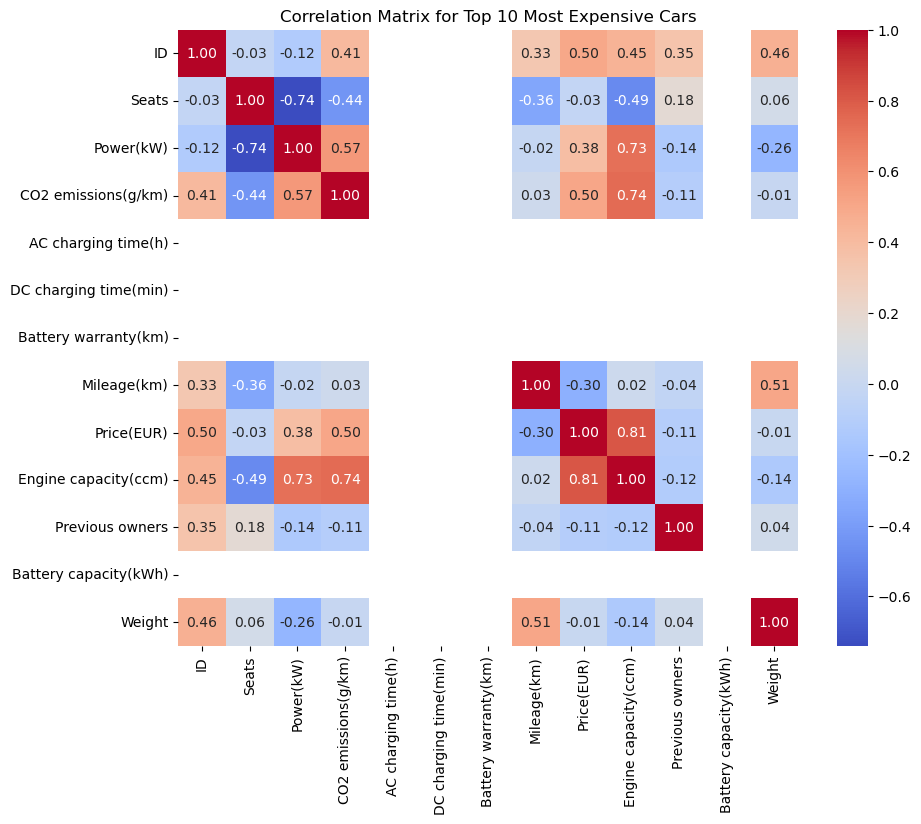

In [7]:
# Chọn ra 10 xe có giá cao nhất
top_10_expensive_cars = clean_df.nlargest(10, 'Price(EUR)')

# Chọn tất cả các cột chứa thông số chi tiết của xe ở dạng numeric
vehicle_specifications = top_10_expensive_cars.select_dtypes(include=np.number)

# Tính ma trận tương quan
correlation_matrix = vehicle_specifications.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Top 10 Most Expensive Cars")
plt.show()

**Comment:**

- ID và các thuộc tính khác: Mối tương quan giữa ID và các thuộc tính khác không rõ ràng, có thể do ID không phản ánh bất kỳ đặc tính nào của xe mà chỉ là một nhãn định danh.
- Số ghế (Seats): Có một mối tương quan âm mạnh (-0.74) giữa số ghế và công suất (Power), có thể suy luận rằng những xe có công suất lớn hơn thường có ít ghế hơn. Cũng có một mối tương quan âm với dung tích động cơ (-0.49), có thể những chiếc xe có ít ghế hơn thường là những mẫu xe thể thao hoặc hiệu suất cao với động cơ lớn hơn.
- Công suất (Power): Có mối tương quan dương mạnh với lượng phát thải CO2 (0.57), điều này cho thấy xe có công suất cao thường phát thải nhiều CO2 hơn.
- Phát thải CO2 (CO2 emissions): Có tương quan dương mạnh (1.00) với chính nó như mong đợi, và các mối tương quan khác không quá đáng kể.
- Bảo hành pin (Battery warranty) và Dung lượng pin (Battery capacity): Không có dữ liệu để đánh giá mối tương quan.
- Quãng đường đi được (Mileage): Có một mối tương quan dương mạnh (1.00) với chính nó và một tương quan âm nhẹ với giá xe (-0.30), có thể cho thấy rằng những xe đi được quãng đường dài hơn có xu hướng có giá thấp hơn.
- Giá cả (Price): Ngoài mối tương quan dương với dung tích động cơ (0.81), giá cả cũng có mối tương quan âm nhẹ với số ghế (-0.30), có thể giả định xe đắt tiền có thể ít ghế hơn, như những mẫu xe thể thao cao cấp.
- Dung tích động cơ (Engine capacity): Có mối tương quan dương với công suất (0.73) và phát thải CO2 (0.74), cho thấy những xe có động cơ lớn hơn thường mạnh mẽ và phát thải nhiều hơn.
- Số chủ sở hữu trước đó (Previous owners): Có rất ít tương quan đáng chú ý với các thuộc tính khác.
- Trọng lượng (Weight): Có mối tương quan dương (1.00) với chính nó, nhưng không có mối tương quan mạnh với các thuộc tính khác.

**Question 02:** How does the mileage (km) vary concerning the number of previous owners, fuel type for cars which is used in the dataset?

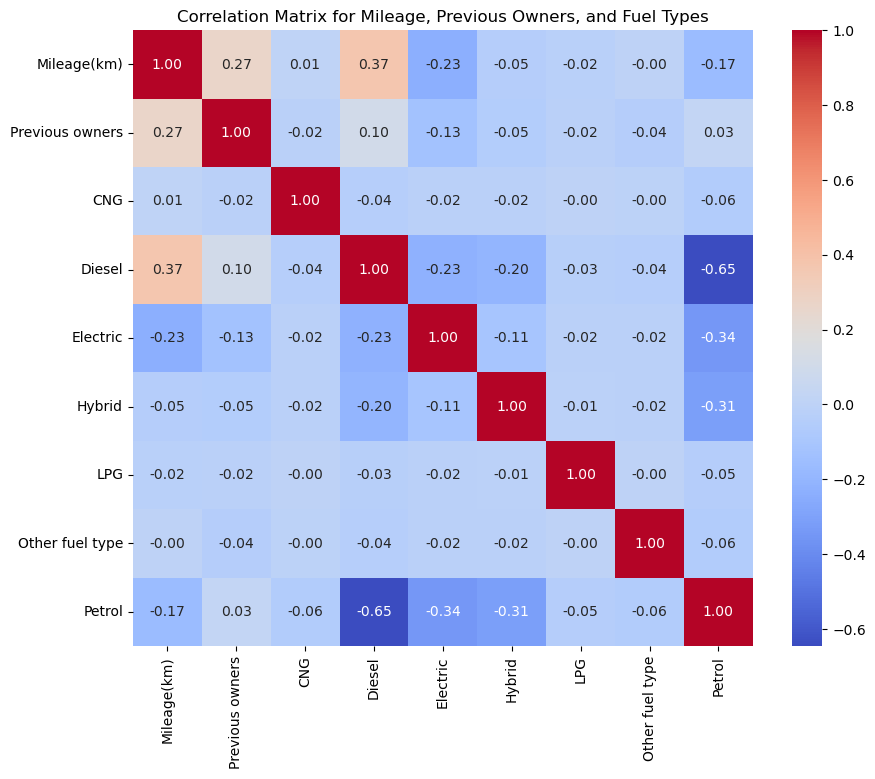

In [8]:
# Tạo một bản sao của clean_df
copy1_df = clean_df.copy()

# Thực hiện One-Hot Encoding cho cột 'Fuel'
encoded_fuel = pd.get_dummies(copy1_df['Fuel'])

# Thêm các cột mã hóa vào DataFrame copy1_df
copy1_df = pd.concat([copy1_df, encoded_fuel], axis=1)

# Xóa cột 'Fuel' gốc vì đã được mã hóa thành các cột mới
copy1_df.drop('Fuel', axis=1, inplace=True)

# Tương tự, thực hiện xử lý cho các cột 'Consumption' và 'First registration'

# Chọn các cột quan tâm, bao gồm cả các cột đã mã hóa
columns_of_interest = ['Mileage(km)', 'Previous owners'] + list(encoded_fuel.columns)

# Tạo DataFrame mới từ các cột quan tâm
data_of_interest = copy1_df[columns_of_interest]

# Tính ma trận tương quan
correlation_matrix = data_of_interest.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Mileage, Previous Owners, and Fuel Types")
plt.show()

**Comment:**

- Mileage và Diesel: Có một tương quan tích cực mạnh (0.37) giữa quãng đường đi được và xe chạy bằng diesel, điều này có thể cho thấy rằng xe diesel thường được sử dụng cho các quãng đường dài hoặc có tuổi đời xe cao hơn.

- Petrol và Diesel: Có một tương quan âm mạnh (-0.65) giữa xe chạy bằng xăng và diesel, điều này có thể phản ánh việc người tiêu dùng có xu hướng chọn một trong hai loại nhiên liệu này khi mua xe, chứ không phải cả hai.

- Electric và Mileage: Có một mối quan hệ tiêu cực nhẹ (-0.23) giữa xe điện và quãng đường đi được, có thể phản ánh việc xe điện mới được sử dụng nhiều và/hoặc chủ yếu được sử dụng trong đô thị với quãng đường ngắn hơn.

- Hybrid và Other Fuel Types: Mối quan hệ âm nhẹ (-0.20) giữa xe hybrid và loại nhiên liệu khác có thể cho thấy rằng xe hybrid ít có khả năng sử dụng loại nhiên liệu không phải là xăng hoặc điện.

- LPG và Other Fuel Types: Cả hai loại nhiên liệu này đều có mối quan hệ rất yếu với các thuộc tính khác, điều này có thể cho thấy rằng chúng không phổ biến hoặc không đặc biệt liên quan đến quãng đường xe đã đi hoặc số lượng chủ sở hữu trước.

# Question

**Question 1:** What is the average power of vehicles for each fuel type?

In [14]:
# Tính trung bình công suất cho từng loại nhiên liệu
average_power_by_fuel = clean_df.groupby('Fuel')['Power(kW)'].mean().reset_index()

# Biểu đồ cột hiển thị trung bình công suất theo loại nhiên liệu
fig = px.bar(average_power_by_fuel, x='Fuel', y='Power(kW)', title='Average Power by Fuel Type')
fig.update_xaxes(categoryorder='total descending')  # Sắp xếp loại nhiên liệu theo thứ tự giảm dần của công suất trung bình
fig.show()

**Comment:**
- Xe sử dụng điện (Electric) có công suất trung bình cao nhất so với các loại nhiên liệu khác, được thể hiện qua cột cao nhất trên biểu đồ. Điều này phản ánh khả năng xe điện có thể cung cấp công suất lớn ngay từ lúc khởi động.

- Xe sử dụng hybrid có công suất trung bình xếp thứ hai, thấp hơn so với xe điện nhưng vẫn cao hơn so với các loại nhiên liệu truyền thống khác.

- Xe sử dụng Diesel và Petrol (xăng) có công suất tương tự nhau và nằm ở mức trung bình trong số các loại nhiên liệu được so sánh. Điều này phản ánh việc cả hai loại nhiên liệu này đều được sử dụng rộng rãi trong các loại xe hơi hiện đại.

- Loại "Other fuel type" có công suất thấp hơn so với Diesel và Petrol, có thể bao gồm các loại nhiên liệu thay thế khác không được liệt kê riêng.

- CNG và LPG có công suất trung bình thấp nhất, được thể hiện qua các cột thấp nhất trong biểu đồ, điều này có thể phản ánh sự ít phổ biến của chúng trong các dòng xe có công suất cao hoặc có thể đây là các loại xe tiết kiệm nhiên liệu với mục đích sử dụng khác.


**Question 2:** How does the engine capacity and power relate to CO2 emissions?

In [15]:
# Biểu đồ scatter plot để quan sát mối quan hệ giữa công suất, dung tích động cơ và CO2 emission
fig = px.scatter(clean_df, x='Engine capacity(ccm)', y='Power(kW)', color='CO2 emissions(g/km)',
                 title='Relationship between Engine Capacity, Power, and CO2 Emissions')
fig.show()

**Comment:**
- Dung tích động cơ và công suất: Có vẻ như có một xu hướng tăng công suất khi dung tích động cơ tăng lên, điều này được thể hiện qua việc các điểm có xu hướng di chuyển lên cao hơn trên trục công suất khi dung tích động cơ lớn hơn.

- Phát thải CO2 và dung tích động cơ: Trong khi không có một xu hướng rõ ràng cho tất cả các điểm, có thể thấy rằng một số xe có dung tích động cơ lớn hơn (từ khoảng 3000 ccm trở lên) có màu sắc chuyển dần sang vàng, cho thấy lượng phát thải CO2 có thể cao hơn.

- Phân bố công suất: Phân bố công suất có vẻ khá rộng lớn, với phần lớn các xe tập trung trong khoảng từ 0 đến khoảng 200 kW. Tuy nhiên, có một số điểm ở mức công suất rất cao, lên tới 800 kW, mà không nhất thiết có dung tích động cơ cực lớn.

- Ngoại lệ: Có một số điểm nằm rất xa so với phần lớn các điểm khác, điều này có thể chỉ ra những xe có đặc tính kỹ thuật rất khác biệt, chẳng hạn như xe thể thao có công suất cao hoặc các xe chuyên dụng.